In [1]:
import ROOT

import os


from my_utils import *
from matplotlib import pyplot as plt
import numpy as np

data_dir = make_data_dir()

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,400)


Welcome to JupyROOT 6.14/04


In [2]:
clear_data_dir()

In [3]:
root_file_name = "joint_tree_prev5000.root"
#root_file_name = "joint_tree_prev1000.root"
#root_file_name = "joint_tree.root"

id="id041"

#varname = "MICRO"
#varname = "PHI"
varname = "X"
#varname  = "THR"

file_list = os.popen('  find /workdir/data -iname "*{:s}" | grep {:s} | sort '.format(
    root_file_name,id)).read().split("\n")

#print("len: {:d}".format(len(file_list)))
#file_list = file_list[0:60]
file_list

['/workdir/data/2019-11-08_23-04-42_id041_R300_HV1750V_thr30_60s_x76.900_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-05-59_id041_R300_HV1750V_thr30_60s_x77.050_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-07-15_id041_R300_HV1750V_thr30_60s_x77.200_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-08-30_id041_R300_HV1750V_thr30_60s_x77.350_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-09-46_id041_R300_HV1750V_thr30_60s_x77.500_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-11-03_id041_R300_HV1750V_thr30_60s_x77.650_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-12-19_id041_R300_HV1750V_thr30_60s_x77.800_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-13-35_id041_R300_HV1750V_thr30_60s_x77.950_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_23-14-50_id041_R300_HV1750V_thr30_60s_x78.100_phi0.00/joint_tree_prev5000.root',
 '/workdir/data/2019-11-08_2

In [4]:
import re

X =  []
PHI =  []
THR = []
MICRO = []

print ("X")

pattern =  re.compile(".*_x([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    x = match.groups()[0]
    X += [float(x)]

print (X)

X
[76.9, 77.05, 77.2, 77.35, 77.5, 77.65, 77.8, 77.95, 78.1, 78.25, 78.4, 78.55, 78.7, 78.85, 79.0, 79.15, 79.3, 79.45, 79.6, 79.75, 79.9, 80.05]


In [5]:
print ("PHI")

pattern =  re.compile(".*_phi([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    phi = match.groups()[0]
    PHI += [float(phi)]

print (PHI)

PHI
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [6]:
print ("THR")

pattern =  re.compile(".*_thr([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    thr = match.groups()[0]
    THR += [float(thr)]

print (THR)

THR
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0]


In [7]:
print ("MICRO")

pattern =  re.compile(".*_micro([0-9E+\-.]+).*/{:s}".format(root_file_name))
for file in file_list:
  #print(file , end="   x: ")
  match = re.search(pattern, file)
  if match:
    micro = match.groups()[0]
    MICRO += [float(micro)]

print (MICRO)

MICRO
[]


In [8]:
#def extract_info(file):

c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

const_list = []
mean_list = []
sigma_list = []
entries_list = []

fish_const_list = []
fish_mean_list = []
fish_sigma_list = []
fish_entries_list = []

const_list_scut = []
mean_list_scut = []
sigma_list_scut = []
entries_list_scut = []

fish_const_list_scut = []
fish_mean_list_scut = []
fish_sigma_list_scut = []
fish_entries_list_scut = []

VAR = X

if varname == "X":
  VAR = X
if varname == "THR":
  VAR = THR
if varname == "PHI":
  VAR = PHI
if varname == "MICRO":
  VAR = MICRO

for i in range(0,len(VAR)):
    
  file=file_list[i]
  var = VAR[i]

##################################################
##                    vw ana                    ##
##################################################


  f = ROOT.TFile(file)
  tree = f.Get("joint_tree")
  #tree.Draw("tot:t1 >> potato(500,0,500e-9,500,0,500e-9)",
  #          "wire == 10 && layer == 1 && chamber == 2",
  #          "colz")

  ### triggers for normalization
  tree.Draw("t1 >> t1(200,-200,800)",
            "chan == 35103",
            "colz")
  t1 = f.Get("t1")
  no_triggers = t1.GetEntries()

  print ("var: {:3.3f} {:s}, no_triggers: {:d}".format(var,varname,int(no_triggers)))
  

  ### t1 of desired wire, wide
  tree.Draw("t1 >> t1(1000,-200,800)",
            "chamber == 2 && layer == 1 && wire == 10",
            "colz")
  c.SaveAs("{:s}/{:3.3f}_t1_wide.png".format(data_dir,var))

  ### t1 of desired wire
  tree.Draw("t1 >> t1(200,-50,100)",
            "chamber == 2 && layer == 1 && wire == 10",
            "colz")
  t1 = f.Get("t1")
  #t1.SetTitle("t1 wire 10, layer 1")
  t1.GetXaxis().SetTitle("t1 (ns)")
  t1.GetYaxis().SetTitle("tot (s)")
  #t1.GetXaxis().SetRangeUser()
  t1.Draw()
  t1.Fit("gaus","")
  t1.Fit("gaus","WW")
    

  fit = t1.GetFunction("gaus");

  try:
    const_list   += [fit.GetParameter(0)/no_triggers]
    mean_list    += [fit.GetParameter(1)]
    sigma_list   += [fit.GetParameter(2)]
    entries_list += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
  except:
    const_list   += [0]
    mean_list    += [0]
    sigma_list   += [0]
    entries_list += [0]
    
  c.SaveAs("{:s}/{:3.3f}_t1.png".format(data_dir,var))
  f.Close()
    
    
    
##################################################
##                   fish ana                   ##
##################################################
    
    
    
  f = ROOT.TFile(file.replace("joint_tree","correlation"))

  fish = f.Get("meta_fish_cut")
  fish.Draw("colz")
  c.SaveAs("{:s}/{:3.3f}_fish.png".format(data_dir,var))

  fish_proj= fish.ProjectionX("fish_proj", 61, 65) # -10/+10
  fish_proj.Draw()

  no_triggers = 1

  t1 = fish_proj
  #t1.SetTitle("t1 wire 10, layer 1")
  t1.GetXaxis().SetTitle("t1 (ns)")
  t1.GetYaxis().SetTitle("tot (s)")
  #t1.GetXaxis().SetRangeUser()
  t1.Draw()
  t1.Fit("gaus","")
  t1.Fit("gaus","WW")
  ROOT.gStyle.SetOptFit(1)
  t1.Draw()  
  c.SaveAs("{:s}/{:3.3f}_fish_proj.png".format(data_dir,var))

  fit = t1.GetFunction("gaus");

  try:
    fish_const_list   += [fit.GetParameter(0)/no_triggers]
    fish_mean_list    += [fit.GetParameter(1)]
    fish_sigma_list   += [fit.GetParameter(2)]
    fish_entries_list += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
  except:
    fish_const_list   += [0]
    fish_mean_list    += [0]
    fish_sigma_list   += [0]
    fish_entries_list += [0]

##################################################
##                scinti_cut ana                ##
##################################################

  try:
    ### t1 of desired wire
    t1 = f.Get("wire_a_t1_scinti_cut")
    #t1.SetTitle("t1 wire 10, layer 1")
    t1.GetXaxis().SetTitle("t1 (ns)")
    t1.GetYaxis().SetTitle("tot (s)")
    #t1.GetXaxis().SetRangeUser()
    t1.Draw()
    t1.Fit("gaus","")
    t1.Fit("gaus","WW")
      
    fit = t1.GetFunction("gaus");
    
    

    const_list_scut   += [fit.GetParameter(0)/no_triggers]
    mean_list_scut    += [fit.GetParameter(1)]
    sigma_list_scut   += [fit.GetParameter(2)]
    entries_list_scut += [(t1.Integral(t1.FindBin(0),t1.FindBin(80)))/no_triggers]   
  except:
    const_list_scut   += [0]
    mean_list_scut    += [0]
    sigma_list_scut   += [0]
    entries_list_scut += [0]
    
  c.SaveAs("{:s}/{:3.3f}_t1_scut.png".format(data_dir,var))

  f.Close()




var: 76.900 X, no_triggers: 4997
var: 77.050 X, no_triggers: 4998
var: 77.200 X, no_triggers: 4999
var: 77.350 X, no_triggers: 4998
var: 77.500 X, no_triggers: 4999
var: 77.650 X, no_triggers: 4998
var: 77.800 X, no_triggers: 4998
var: 77.950 X, no_triggers: 4999
var: 78.100 X, no_triggers: 4999
var: 78.250 X, no_triggers: 4996
var: 78.400 X, no_triggers: 4997
var: 78.550 X, no_triggers: 4998
var: 78.700 X, no_triggers: 4999
var: 78.850 X, no_triggers: 4998
var: 79.000 X, no_triggers: 4999
var: 79.150 X, no_triggers: 4999
var: 79.300 X, no_triggers: 4998
var: 79.450 X, no_triggers: 4999
var: 79.600 X, no_triggers: 4997
var: 79.750 X, no_triggers: 4997
var: 79.900 X, no_triggers: 4998
var: 80.050 X, no_triggers: 4998
 FCN=142.73 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=1.7148e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR       

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName
Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/76.900_t1_wide.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/76.900_t1.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/76.900_fish.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/76.900_fish_proj.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/76.900_t1_scut.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/77.050_t1_wide.png has been created
Info in <TCanvas::Print>: png file /workdir/jupyter/offline_quick_ana_combi_data/77.05

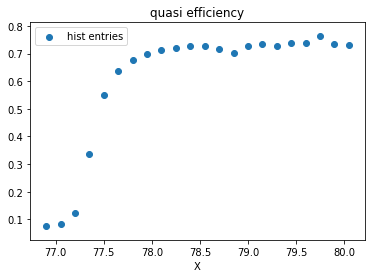

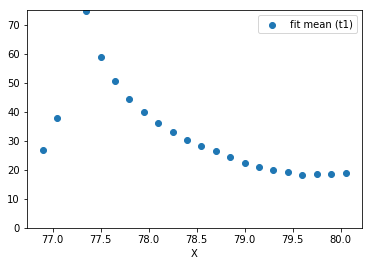

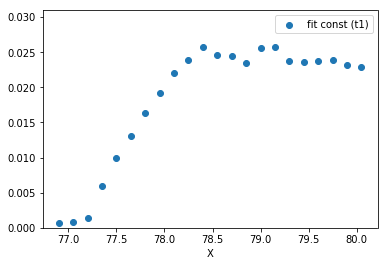

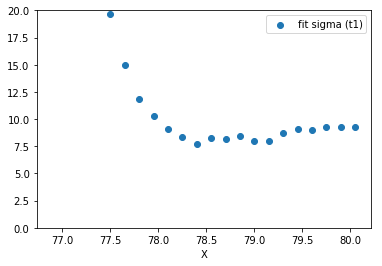

In [9]:
##################################################
##                    vw ana                    ##
##################################################


plt.scatter(VAR,entries_list,label="hist entries")
#plt.plot(VAR,entries_list,label="hist entries")
#plt.ylim(0,np.max(entries_list)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("quasi efficiency")
plt.show()

plt.scatter(VAR,mean_list,label="fit mean (t1)")
#plt.plot(VAR,mean_list,label="fit mean (t1)")
#plt.ylim(0,np.max(mean_list)*1.2)
plt.legend()
plt.xlabel(varname)
plt.ylim(0,75)
plt.show()

plt.scatter(VAR,const_list,label="fit const (t1)")
#plt.plot(VAR,const_list,label="fit const (t1)")
plt.ylim(0,np.max(const_list)*1.2)
plt.legend()
plt.xlabel(varname)
#plt.ylim(0,0.3)
plt.show()

plt.scatter(VAR,sigma_list,label="fit sigma (t1)")

#plt.plot(VAR,sigma_list,label="fit sigma (t1)")
#plt.ylim(0,np.max(sigma_list)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
plt.show()

#area_list = np.array(const_list) * np.array(sigma_list)

#plt.scatter(VAR,area_list,label="gaus area")
#plt.ylim(0,np.max(area_list))
#plt.legend()
#plt.ylim(0,5)
#plt.show()

saving to /workdir/jupyter/offline_quick_ana_combi_data/000.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/000.pickle


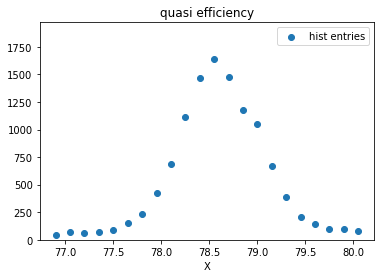

saving to /workdir/jupyter/offline_quick_ana_combi_data/001.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/001.pickle


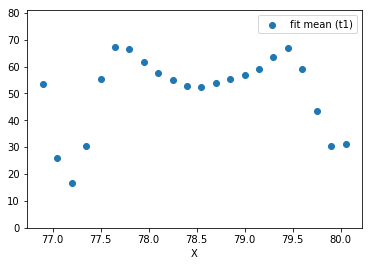

saving to /workdir/jupyter/offline_quick_ana_combi_data/002.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/002.pickle


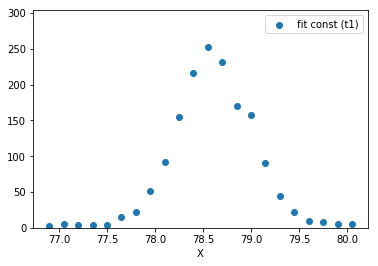

saving to /workdir/jupyter/offline_quick_ana_combi_data/003.svg
saving to /workdir/jupyter/offline_quick_ana_combi_data/003.pickle


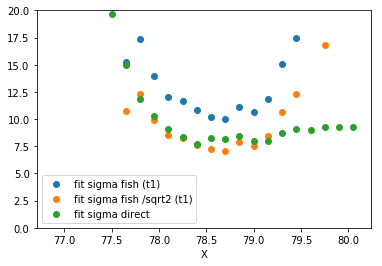

In [10]:
##################################################
##                   fish ana                   ##
##################################################


plt.scatter(VAR,fish_entries_list,label="hist entries")
#plt.plot(VAR,fish_entries_list,label="hist entries")
plt.ylim(0,np.max(fish_entries_list)*1.2)
plt.legend()
plt.title("quasi efficiency")
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_mean_list,label="fit mean (t1)")
#plt.plot(VAR,fish_mean_list,label="fit mean (t1)")
plt.ylim(0,np.max(fish_mean_list)*1.2)
plt.legend()
#plt.ylim(0,75)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_const_list,label="fit const (t1)")
#plt.plot(VAR,fish_const_list,label="fit const (t1)")
plt.ylim(0,np.max(fish_const_list)*1.2)
plt.legend()
#plt.ylim(0,0.3)
plt.xlabel(varname)
show(plt)

plt.scatter(VAR,fish_sigma_list,label="fit sigma fish (t1)")
plt.scatter(VAR,np.array(fish_sigma_list)/np.sqrt(2),label="fit sigma fish /sqrt2 (t1)")
plt.scatter(VAR,sigma_list,label="fit sigma direct")
#plt.plot(VAR,fish_sigma_list,label="fit sigma (t1)")
plt.ylim(0,np.max(fish_sigma_list)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
show(plt)



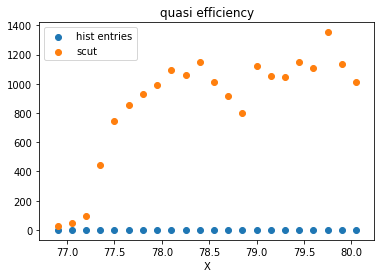

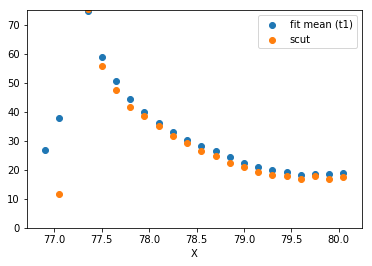

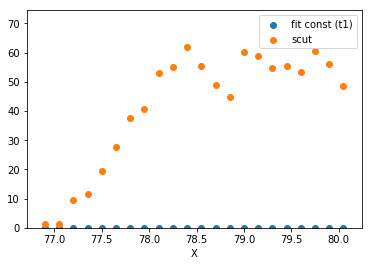

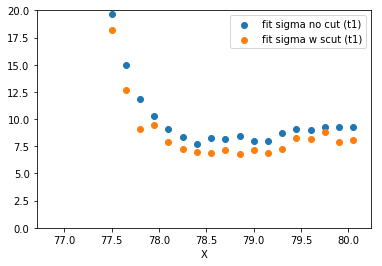

In [11]:


##################################################
##                scinti_cut ana                ##
##################################################



plt.scatter(VAR,entries_list,label="hist entries")
plt.scatter(VAR,entries_list_scut,label="scut")
#plt.plot(VAR,entries_list_scut,label="hist entries")
#plt.ylim(0,np.max(entries_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.title("quasi efficiency")
plt.show()

plt.scatter(VAR,mean_list,label="fit mean (t1)")
plt.scatter(VAR,mean_list_scut,label="scut")
#plt.plot(VAR,mean_list_scut,label="fit mean (t1)")
#plt.ylim(0,np.max(mean_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
plt.ylim(0,75)
plt.show()

plt.scatter(VAR,const_list,label="fit const (t1)")
plt.scatter(VAR,const_list_scut,label="scut")
#plt.plot(VAR,const_list_scut,label="fit const (t1)")
plt.ylim(0,np.max(const_list_scut)*1.2)
plt.legend()
plt.xlabel(varname)
#plt.ylim(0,0.3)
plt.show()

plt.scatter(VAR,sigma_list,label="fit sigma no cut (t1)")
plt.scatter(VAR,sigma_list_scut,label="fit sigma w scut (t1)")

#plt.plot(VAR,sigma_list_scut,label="fit sigma (t1)")
#plt.ylim(0,np.max(sigma_list_scut)*1.2)
plt.ylim(0,20)
plt.legend()
plt.xlabel(varname)
plt.show()

#area_list_scut = np.array(const_list_scut) * np.array(sigma_list_scut)

#plt.scatter(VAR,area_list_scut,label="gaus area")
#plt.ylim(0,np.max(area_list_scut))
#plt.legend()
#plt.ylim(0,5)
#plt.show()

In [13]:
#archive(label="{:s}_{:s}_{:s}".format(id,root_file_name,varname))

archived to ./archive/2019-11-09_00-09-09_offline_quick_ana_combi_id041_joint_tree_prev5000.root_X
